<a href="https://colab.research.google.com/github/RishiKDA/Heart-Disease-Prediction-Using-Logistic-Regression/blob/main/Heart_Disease_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Cell 1 — Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [35]:
# Cell 2 — Load dataset from GitHub (Permanent)

url = "https://raw.githubusercontent.com/RishiKDA/Heart-Disease-Prediction-Using-Logistic-Regression/main/Heart_disease_cleveland_new.csv"

df = pd.read_csv(url)

print("✅ Dataset loaded successfully!")
df.head()


✅ Dataset loaded successfully!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [36]:
# Cell 3 — Convert raw dataset into simple English terms

# Rename gender
df['Gender'] = df['sex'].map({1:'Male', 0:'Female'})

# Chest pain explained
cp_map = {0:'No Chest Pain', 1:'Mild Chest Pain', 2:'Moderate Chest Pain', 3:'Severe Chest Pain'}
df['Chest Pain'] = df['cp'].map(cp_map)

# Blood sugar simplified
df['High Blood Sugar'] = df['fbs'].map({1:'Yes', 0:'No'})

# ECG simplified
ecg_map = {0:'Normal ECG', 1:'Minor Issue', 2:'Major Issue'}
df['ECG Result'] = df['restecg'].map(ecg_map)

# Exercise-induced chest pain simplified
df['Exercise Pain'] = df['exang'].map({1:'Yes', 0:'No'})

# Thalassemia simplified
thal_map = {0:'Normal', 1:'Fixed Defect', 2:'Reversible Defect'}
df['Thalassemia'] = df['thal'].map(thal_map)

# Rename columns into human language
df.rename(columns={
    'age':'Age',
    'trestbps':'Resting BP',
    'chol':'Cholesterol',
    'thalach':'Max Heart Rate',
    'oldpeak':'Stress Indicator',
    'slope':'Heart Rate Slope',
    'ca':'Blocked Arteries',
    'target':'Heart Disease'
}, inplace=True)

df.head()


,Age,sex,cp,Resting BP,Cholesterol,fbs,restecg,Max Heart Rate,exang,Stress Indicator,Heart Rate Slope,Blocked Arteries,thal,Heart Disease,Gender,Chest Pain,High Blood Sugar,ECG Result,Exercise Pain,Thalassemia
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0,Male,No Chest Pain,Yes,Major Issue,No,Reversible Defect
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1,Male,Severe Chest Pain,No,Major Issue,Yes,Fixed Defect
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1,Male,Severe Chest Pain,No,Major Issue,Yes,NaN
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0,Male,Moderate Chest Pain,No,Normal ECG,No,Fixed Defect
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0,Female,Mild Chest Pain,No,Major Issue,No,Fixed Defect


In [37]:
# Cell 4 — Create machine-learning friendly numeric dataset

df_ml = pd.DataFrame()

df_ml['age'] = df['Age']
df_ml['sex'] = df['Gender'].map({'Male':1, 'Female':0})
df_ml['cp'] = df['Chest Pain'].map({
    'No Chest Pain':0, 'Mild Chest Pain':1,
    'Moderate Chest Pain':2, 'Severe Chest Pain':3
})
df_ml['trestbps'] = df['Resting BP']
df_ml['chol'] = df['Cholesterol']
df_ml['fbs'] = df['High Blood Sugar'].map({'Yes':1,'No':0})
df_ml['restecg'] = df['ECG Result'].map({'Normal ECG':0,'Minor Issue':1,'Major Issue':2})
df_ml['thalach'] = df['Max Heart Rate']
df_ml['exang'] = df['Exercise Pain'].map({'Yes':1,'No':0})
df_ml['oldpeak'] = df['Stress Indicator']
df_ml['slope'] = df['Heart Rate Slope']
df_ml['ca'] = df['Blocked Arteries']
df_ml['thal'] = df['Thalassemia'].map({'Normal':0,'Fixed Defect':1,'Reversible Defect':2})
df_ml['target'] = df['Heart Disease']

df_ml.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2.0,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1.0,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,NaN,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1.0,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1.0,0


In [38]:
# Cell 5 — Split into training and testing

X = df_ml.drop('target', axis=1)
y = df_ml['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (242, 13)
Test size: (61, 13)


In [39]:
# Cell 6 — Scale numeric values

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling completed!")


Scaling completed!


In [40]:
# Cell 6.5 — Fix all training issues (ValueError cleanup)

# 1. Ensure ALL df_ml columns are numeric
df_ml = df_ml.apply(pd.to_numeric, errors='coerce')

# 2. Drop rows with missing values
df_ml.dropna(inplace=True)

# 3. Rebuild X and y after cleaning
X = df_ml.drop('target', axis=1)
y = df_ml['target']

# 4. Re-split after cleaning
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Re-scale after cleaning
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("🎉 Cleaned and ready for model training!")
print("Shapes → Train:", X_train.shape, "Test:", X_test.shape)


🎉 Cleaned and ready for model training!
Shapes → Train: (148, 13) Test: (38, 13)


In [41]:
# Cell 7 — Train logistic regression model

model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

print("🎉 Model trained successfully!")


🎉 Model trained successfully!


In [42]:
# Cell 8 — Model Evaluation

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        26
           1       0.86      0.50      0.63        12

    accuracy                           0.82        38
   macro avg       0.83      0.73      0.75        38
weighted avg       0.82      0.82      0.80        38


Confusion Matrix:
[[25  1]
 [ 6  6]]

AUC Score: 0.9391025641025642


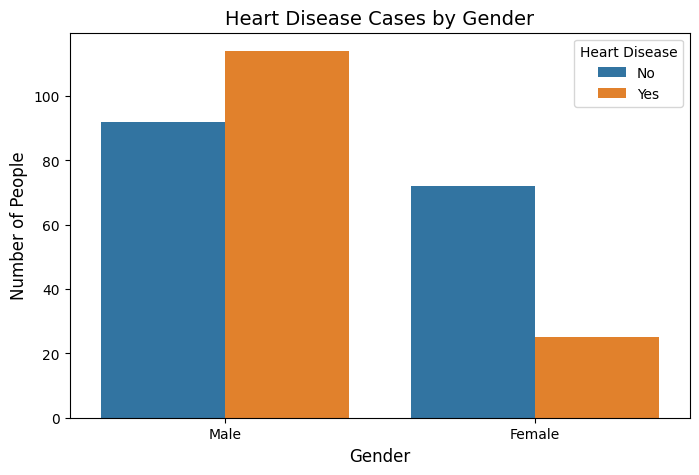

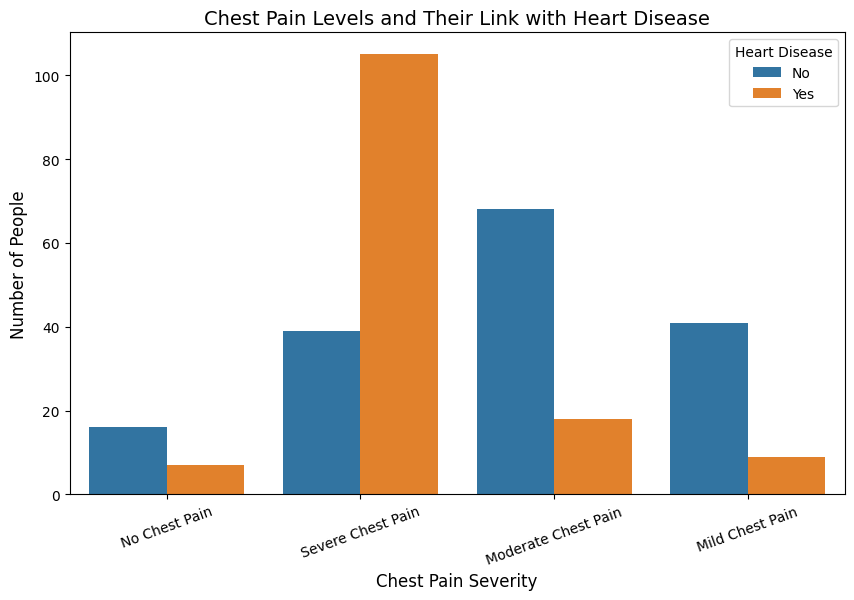

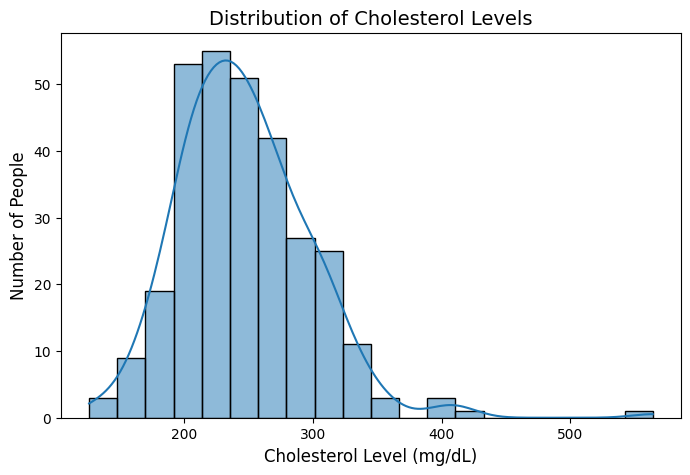

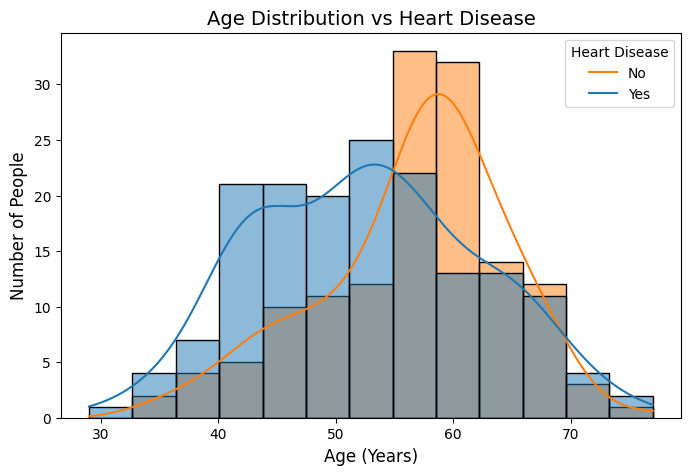

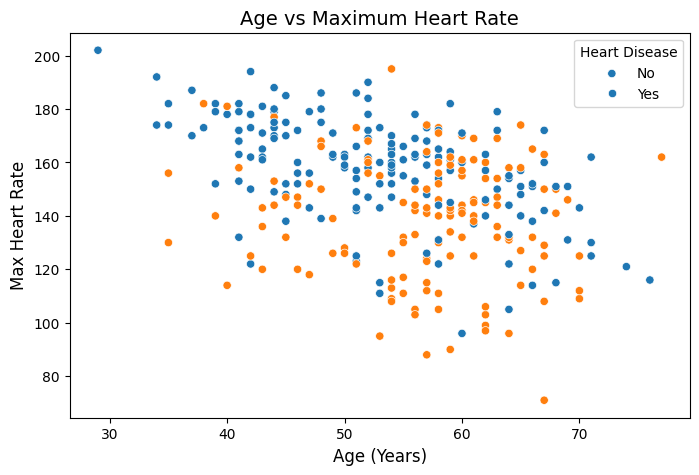

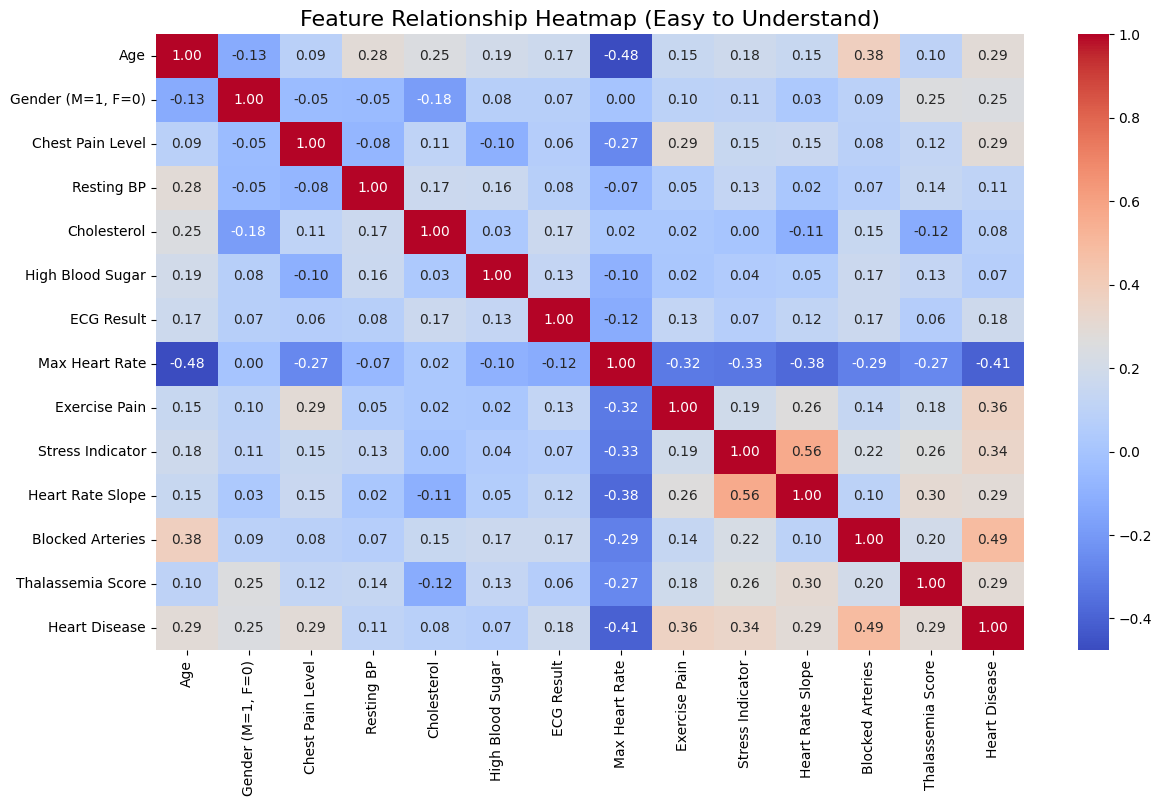

In [43]:
# Cell 9 — Fully Beginner-Friendly Visualizations

# ------------------------------
# 1. Heart Disease in Males vs Females
# ------------------------------
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Gender', hue='Heart Disease')
plt.title("Heart Disease Cases by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of People", fontsize=12)
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

# ------------------------------
# 2. Chest Pain Level vs Heart Disease
# ------------------------------
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Chest Pain', hue='Heart Disease')
plt.title("Chest Pain Levels and Their Link with Heart Disease", fontsize=14)
plt.xlabel("Chest Pain Severity", fontsize=12)
plt.ylabel("Number of People", fontsize=12)
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.xticks(rotation=20)
plt.show()

# ------------------------------
# 3. Cholesterol Distribution
# ------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['Cholesterol'], bins=20, kde=True)
plt.title("Distribution of Cholesterol Levels", fontsize=14)
plt.xlabel("Cholesterol Level (mg/dL)", fontsize=12)
plt.ylabel("Number of People", fontsize=12)
plt.show()

# ------------------------------
# 4. Age vs Heart Disease Risk
# ------------------------------
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Heart Disease', kde=True)
plt.title("Age Distribution vs Heart Disease", fontsize=14)
plt.xlabel("Age (Years)", fontsize=12)
plt.ylabel("Number of People", fontsize=12)
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

# ------------------------------
# 5. Max Heart Rate vs Heart Disease
# ------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Max Heart Rate', hue='Heart Disease')
plt.title("Age vs Maximum Heart Rate", fontsize=14)
plt.xlabel("Age (Years)", fontsize=12)
plt.ylabel("Max Heart Rate", fontsize=12)
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

# ------------------------------
# 6. Heatmap with Friendly Labels
# ------------------------------

# Create a new copy with friendly column names
corr_df = df_ml.copy()
corr_df.rename(columns={
    'age': 'Age',
    'sex': 'Gender (M=1, F=0)',
    'cp': 'Chest Pain Level',
    'trestbps': 'Resting BP',
    'chol': 'Cholesterol',
    'fbs': 'High Blood Sugar',
    'restecg': 'ECG Result',
    'thalach': 'Max Heart Rate',
    'exang': 'Exercise Pain',
    'oldpeak': 'Stress Indicator',
    'slope': 'Heart Rate Slope',
    'ca': 'Blocked Arteries',
    'thal': 'Thalassemia Score',
    'target': 'Heart Disease'
}, inplace=True)

plt.figure(figsize=(14,8))
sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Relationship Heatmap (Easy to Understand)", fontsize=16)
plt.show()


In [44]:
# Cell 10 — Predict for a manually entered new patient

def predict_new_patient(model):
    print("=== Enter New Patient Details ===")

    gender = input("Gender (M/F): ").upper()
    gender = 1 if gender == "M" else 0

    age = int(input("Age: "))
    cp = int(input("Chest Pain (0=None,1=Mild,2=Moderate,3=Severe): "))
    bp = int(input("Resting BP: "))
    chol = int(input("Cholesterol Level: "))
    sugar = int(input("High Blood Sugar? (1=Yes,0=No): "))
    ecg = int(input("ECG Result (0=Normal,1=Minor,2=Major): "))
    hr = int(input("Max Heart Rate: "))
    angina = int(input("Exercise Pain? (1=Yes,0=No): "))
    stress = float(input("Stress Indicator Value: "))
    slope = int(input("Heart Rate Slope (0=Down,1=Flat,2=Up): "))
    blocked = int(input("Blocked Arteries (0–3): "))
    thal = int(input("Thalassemia (0=Normal,1=Fixed,2=Reversible): "))

    new = pd.DataFrame([{
        'age': age, 'sex': gender, 'cp': cp, 'trestbps': bp,
        'chol': chol, 'fbs': sugar, 'restecg': ecg, 'thalach': hr,
        'exang': angina, 'oldpeak': stress, 'slope': slope,
        'ca': blocked, 'thal': thal
    }])

    scaled = scaler.transform(new)
    prob = model.predict_proba(scaled)[:, 1][0]
    pred = model.predict(scaled)[0]

    print("\n=== Prediction ===")
    print(f"Heart Disease Probability: {prob*100:.2f}%")

    if prob < 0.33:
        print("Risk Level: LOW")
    elif prob < 0.66:
        print("Risk Level: MODERATE")
    else:
        print("Risk Level: HIGH")

    print("Final Prediction:", "Heart Disease" if pred == 1 else "No Heart Disease")


In [45]:
# Cell 11 — Execute manual input prediction
predict_new_patient(model)


=== Enter New Patient Details ===
Gender (M/F): M
Age: 18
Chest Pain (0=None,1=Mild,2=Moderate,3=Severe): 3
Resting BP: 135
Cholesterol Level: 200
High Blood Sugar? (1=Yes,0=No): 0
ECG Result (0=Normal,1=Minor,2=Major): 2
Max Heart Rate: 120
Exercise Pain? (1=Yes,0=No): 1
Stress Indicator Value: 3
Heart Rate Slope (0=Down,1=Flat,2=Up): 2
Blocked Arteries (0–3): 2
Thalassemia (0=Normal,1=Fixed,2=Reversible): 2

=== Prediction ===
Heart Disease Probability: 96.21%
Risk Level: HIGH
Final Prediction: Heart Disease
